In [ ]:
def missing_column(dfObj):
    table = pd.DataFrame(dfObj.isna().sum())
    table.reset_index(inplace=True)
    table = table.rename(columns = {'index':'KPI'})
    table = table.rename(columns = {0:'Missing Values Col', 1:'Missing Values Col %'})
    table['Missing Values Col %'] = table['Missing Values Col'] / len(dfObj.index)
    return table.sort_values(by=['Missing Values Col %'], ascending=False)
# Source: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise

def delete_missing_column(dfObj, bench):
    dfObj_copy = dfObj[list((missing_column(dfObj)).loc[(missing_column(dfObj))['Missing Values Col %'] < bench]['KPI'].values)]
    return dfObj_copy
#missing_row(main)#.groupby('Year').agg('sum').add_suffix("_sum")#.reset_index()

def missing_row(dfObj):
    div = len(dfObj.columns) - 4
    dfObj2 = dfObj
    dfObj_list = []
    for i in range(len(dfObj2.index)):
        dfObj_list.append(dfObj2.iloc[i].isnull().sum())
    dfObj2['Missing Values Row'] = dfObj_list
    dfObj2['Missing Values Row %'] = round(dfObj2['Missing Values Row'] / div,2)
    dfObj2 = dfObj2.sort_values(by=['Missing Values Row %'], ascending=False)
    return dfObj2

def delete_missing_row(dfObj, bench):
    dfObj_copy = dfObj.loc[(missing_row(dfObj))['Missing Values Row %'] < bench]
    #dfObj_copy = dfObj.loc[dfObj['Company_ID'].isin(list((missing_row(dfObj)).loc[(missing_row(dfObj))['Missing Values Row %'] < bench]['Company_ID']))]
    return dfObj_copy

def missing_years(dfObj, column):
    year = (missing_row(dfObj))[['Year', column]].groupby('Year').agg('mean')#.reset_index()
    year.reset_index(inplace=True)
    year = year.rename(columns = {'index':'Year'})
    return year

def missing_company(dfObj, column):
    year = (missing_row(dfObj))[['Company_ID', column]].groupby('Company_ID').agg('mean')#.reset_index()
    year.reset_index(inplace=True)
    year = year.rename(columns = {'index':'Company_ID'})
    return year

def unique_values(dfObj,col):
    #return dfObj.groupby(col).agg('mean').isnull()
    sns.set(rc={'figure.figsize':(11,8)})
    view = sns.heatmap(dfObj.groupby(col).agg('count').astype(int).replace({0: None}).isnull(), cbar=False,cmap="PiYG_r")  
    return view

def unique_values_list(dfObj,col):
    #return dfObj.groupby(col).agg('mean').isnull()
    table = dfObj.groupby(col).agg('count').astype(int).replace({0: None}).isnull().transpose()
    table.reset_index(inplace=True)
    table = table.rename(columns = {'index':'KPI'})
    return table

#### Z-Scoring
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        if column != 'Company_ID' and column != 'Year':
            df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std() 
        return df_std
# call the z_score function
#Source: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

def normal(df):
    # copy the dataframe
    df_min_max_scaled = df.copy()
    # apply the z-score method
    for column in df_min_max_scaled.columns:
        if column != 'Company_ID' and column != 'Year':
            df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
        return df_min_max_scaled

def obj_frame(obj, func):
    obj.reset_index(inplace=True)
    obj = obj.rename(columns = {'index':'KPI', 0: func})
    return obj.sort_values(by=func)

## Data Quality

In [ ]:
import pandas as pd
import numpy as np
import regex

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [ ]:
rootDir = r"C:\Users\julii\PycharmProjects\FoodSecurity\Education\ressources"

IR = pd.read_csv(rootDir + r'\ressources\IR_csv_tmp')
IR["CASEID"] = IR["CASEID"].astype(str).replace("\s", "", regex = True)
IR.name = "IR"

MR = pd.read_csv(rootDir + r'\ressources\MR_csv_tmp')
MR['MCASEID'] = MR['MCASEID'].str.replace("\s", "", regex = True)
MR['MCASEID'] = MR['MCASEID'].str.replace("^0+", "", regex = True)
MR.name = "MR"

PR = pd.read_csv(rootDir + r'\ressources\PR_csv_tmp')
PR["CASEID"] = PR["HHID"].astype(str) + PR["HVIDX"].apply(lambda x: " " + str(x).split(".")[0])
PR["CASEID"] = PR["CASEID"].astype(str).replace("\s", "", regex = True)
PR.name = "PR"

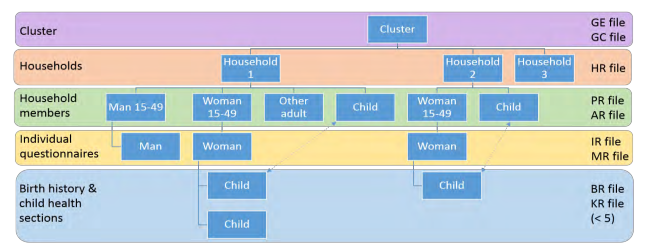

In [ ]:
CODES_AND_QUESTIONS = {##### Source: https://dhsprogram.com/data/Guide-to-DHS-Statistics/Organization_of_DHS_Data.htm
### Household Member Recode (PR) ###
"PR": {  
"HHID": "Case identification, used to uniquely identify each respondent",
"HVIDX": "Case line number", 
"CASEID": "Case identification, used to uniquely identify each respondent",
"GEID": "geographical Mapping",
"HA66": "woman's highest educational level",
"HA67": "woman's highest year of education",
"HA68": "woman's highest educational level (questionnaire configuration), highest educational level (for preliminary & final report), highest educational level (cs for preliminary & final report), woman's highest educational level (for preliminary and final report)",
"HB66": "man's highest educational level",
"HB67": "man's highest year of education",
"HB68": "man's highest educational level (questionnaire configuration), man's highest educational level (for preliminary and final report), highest educational level (cs for preliminary & final report)",
"HC61": "mother's highest educational level",
"HC62": "mother's highest year of education",
"HC68": "highest educational level (cs for preliminary & final report), mother's highest educational level (for preliminary and final report), highest educational level ( for preliminary & final report), mother's highest educational level (questionnaire configuration)",
"HV000": "country code and phase",
"HV001": "cluster number",
"HV002": "household number",
"HV003": "respondent's line number (answering household questionnaire), respondent's line number",
"HV004": "ultimate area unit",
"HV006": "month of interview",
"HV007": "year of interview",
"HV008": "date of interview (cmc)",
"HV009": "number of household members",
"HV016": "day of interview",
"HV024": "province, transmission zones, region",
"HV105": "age of household members",
"HV106": "highest educational level attained, highest educational level",
"HV107": "highest year of education, highest year of education completed",
"HV108": "education completed in single years, education in single years",
"HV109": "educational attainment",
"HV121": "member attended school during current school year",
"HV122": "educational level during current school year",
"HV123": "grade of education during current school year",
"HV124": "education in single years - current school year",
"HV125": "member attended school during previous school year",
"HV126": "educational level during previous school year",
"HV127": "grade of education during previous school year",
"HV128": "education in single years - previous school year",
"HV129": "school attendance status"},
### Men’s Recode (MR) ###
"MR": {
"MCASEID": "Case identification, used to uniquely identify each respondent",
"MV000": "country code and phase",
"MV001": "cluster number",
"MV002": "household number",
"MV003": "respondent's line number",
"MV004": "ultimate area unit",
"MV005": "sample weight, men's sample weight (6 decimals)",
"MV006": "month of interview",
"MV007": "year of interview",
"MV008": "date of interview (cmc)",
"MV012": "current age - respondent, current age",
"MV013": "age 5-year groups, age in 5-year groups",
"MV016": "day of interview",
"MV024": "province, region",
"MV104": "years lived in place of residence, years lived in place of res.",
"MV107": "highest year of education, highest year of education (at level in mv106)",
"MV133": "education in single years, total number of years of education",
"MV149": "educational attainment",
"MV155": "literacy",
"MV156": "ever participated in a literacy program (excluding primary school), ever participated in a literacy program outside of primary",
"MV157": "frequency of reading newspaper or magazine",
"MV158": "frequency of listening to radio"},

###  Women’s Individual Recode (IR) ###
"IR": {
"CASEID": "Case identification, used to uniquely identify each respondent",
"V000": "country code and phase",
"V001": "cluster number",
"V002": "household number",
"V003": "respondent's line number",
"V004": "ultimate area unit",
"V005": "women's individual sample weight (6 decimals), sample weight",
"V006": "month of interview",
"V007": "year of interview",
"V008": "date of interview (cmc)",
"V012": "current age - respondent, respondent's current age",
"V013": "age 5-year groups, age in 5-year groups",
"V016": "day of interview",
"V024": "province, transmission zones, region",
"V034": "line number of husband",
"V104": "years lived in place of residence, years lived in place of res.",
"V107": "highest year of education",
"V133": "education in single years",
"V149": "educational attainment",
"V155": "literacy",
"V156": "ever participated in a literacy program outside of primary",
"V157": "frequency of reading newspaper or magazine",
"V158": "frequency of listening to radio",
"V701": "husband/partner's education level, partner's education level",
"V702": "highest year of education, husband/partner's highest year of education (at level in v701)",
"V715": "husband/partner's total number of years of education, husbands education-single yrs",
"V729": "partner's educational attainm., husband/partner's educational attainment"}}

### Data Quality

In [ ]:
for df in [IR, MR, PR]:
    #drop Unnamed columns
    try:
        df.drop("Unnamed: 0", axis=1, inplace = True) 
    except:
        pass
    #drop duplicates based on all values
    df.drop_duplicates(inplace = True) 
    try:
        df.drop_duplicates(inplace = True) 
    except:
        pass
    #drop if the cluster number is missing
    try:
        column = df.filter(regex=(".*?V001")).columns[0]     
        df.drop(df.loc[df[column].isna()].index, inplace=True) 
    except:
        pass
    #drop if the column is not listed in the dictionary / not neccesary
    try:
        for col in df.columns:
            if col not in CODES_AND_QUESTIONS[df.name].keys():
                df.drop(columns=[col], inplace = True) 

    except:
        pass
    #create a multi-index
    index = pd.MultiIndex.from_tuples([(col, CODES_AND_QUESTIONS[df.name][col]) for col in df.columns], names=["CODE", "QUESTION"])
    index_rows = pd.DataFrame(columns=index)
    df.columns = index   

In [ ]:
PR_IR = pd.merge(PR, IR, how='left', left_on=[("CASEID", "Case identification, used to uniquely identify each respondent"), ("HV000", "country code and phase")], right_on=[("CASEID", "Case identification, used to uniquely identify each respondent"), ("V000", "country code and phase")])

In [ ]:
PR_IR_MR = pd.merge(PR_IR, MR, how='left', left_on=[("CASEID", "Case identification, used to uniquely identify each respondent"), ("HV000", "country code and phase")], right_on=[("MCASEID", "Case identification, used to uniquely identify each respondent"), ("MV000", "country code and phase")])

In [ ]:
PR_IR_MR_QA = pd.DataFrame(PR_IR_MR.isna().sum()).reset_index()
PR_IR_MR_QA.columns = ['C', 'Q', 'NA']
PR_IR_MR_QA["NA%"] = PR_IR_MR_QA["NA"].apply(lambda x: x/len(PR_IR_MR)*100)
PR_IR_MR_QA.sort_values(by=['NA'], ascending=True)
#PR_IR_MR_QA.sort_values(by=['NA'], ascending=True)[PR_IR_MR_QA["NA%"] < 50]

In [ ]:
main_analysis = PR_IR_MR[[("CASEID", "Case identification, used to uniquely identify each respondent"), ("HV106", "highest educational level attained, highest educational level"), ("HV108", "education completed in single years, education in single years"), ("HV109", "educational attainment"), ("HV121", "member attended school during current school year"), ("HV122", "educational level during current school year"), ("HV124", "education in single years - current school year")]]

In [10]:
### ID-Ness
lens = []

main_analysis_idness =  pd.DataFrame(main_analysis.columns, columns=['KPI'])
for x in main_analysis.columns:
    lens.append((len(list(unique_values_list(main_analysis,x).columns[1:]))))

main_analysis_idness['No of Unique'] = lens 
main_analysis_idness['ID-NESS']      = (main_analysis_idness['No of Unique'] / len(main_analysis)).round(2)

In [11]:
### Skewsness
main_analysis_skew = obj_frame(main_analysis.skew().round(2).to_frame(), 'SKEWNESS')
skew = pd.cut(obj_frame(main_analysis.skew().round(2).to_frame(), 'SKEWNESS').SKEWNESS,bins=[-100,-2,2,100],labels=['L','S','R'])
main_analysis_skew.insert(2,'SKEWED',skew)

In [12]:
### Kurtosis
main_analysis_kurtosis = obj_frame(main_analysis.kurtosis().round(2).to_frame(), 'KURTOSIS')
kurt = pd.cut(main_analysis_kurtosis.KURTOSIS,bins=[-1000,2,4,1000],labels=['PLATY','MESO','LEPTO'])
main_analysis_kurtosis.insert(2,'KURTIC',kurt)

In [13]:
### Descriptive Analysis
main_analysis_std = obj_frame(main_analysis.std().round(2).to_frame(), 'STD')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2024\1206604950.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_analysis_std = obj_frame(main_analysis.std().round(2).to_frame(), 'STD')


In [ ]:
main_analysis_mean = obj_frame(main_analysis.mean().round(2).to_frame(), 'MEAN')

In [ ]:
main_analysis_median = obj_frame(main_analysis.median().round(2).to_frame(), 'MEDIAN')

In [ ]:
main_analysis_max = obj_frame(main_analysis.max().round(2).to_frame(), 'MAX')

In [ ]:
main_analysis_min = obj_frame(main_analysis.min().round(2).to_frame(), 'MIN')

In [ ]:
main_analysis_range = pd.merge(main_analysis_min,main_analysis_max, how='left', left_on=['KPI'], right_on=['KPI'],suffixes=('', ''))

In [ ]:
main_analysis_range['RANGE'] =  (main_analysis_range['MAX']  -  main_analysis_range['MIN']).round(2)

In [ ]:
### Correlation
main_analysis_corr = obj_frame(main_analysis.corr().mean().round(2).to_frame(), 'CORR')

In [ ]:
### Coefficient of variation
main_analysis_describe = pd.merge(main_analysis_std,main_analysis_mean, how='left', left_on=['KPI'], right_on=['KPI'],suffixes=('', ''))
main_analysis_describe['COEF'] =  (main_analysis_describe['STD']  /  main_analysis_describe['MEAN']).round(2)
#https://codefather.tech/blog/pandas-standard-deviation/

In [ ]:
### Gini Coeffizient
import numpy as np
from pygini import gini

gini_val = pd.DataFrame(columns=['KPI', 'GINI'])

li = []
kpi = []

for x in main_analysis.columns:
    b=main_analysis[x].values
    c = b[~np.isnan(b)].astype('float64')
    li.append(gini(c).round(2))
    kpi.append(x)
    #.to_frame()
gini_val['GINI'] = li
gini_val['KPI'] = kpi
#https://pypi.org/project/pygini/'

In [ ]:
### Merge multiple Dataframes
from functools import reduce

# compile the list of dataframes you want to merge
data_frames = [main_analysis_skew,main_analysis_kurtosis,main_analysis_describe,main_analysis_range,main_analysis_median,gini_val,main_analysis_corr]
main_analysis_merge = reduce(lambda  left,right: pd.merge(left,right,on=['KPI'],how='outer'), data_frames)
main_analysis_merge = main_analysis_merge.round(2)
#Source: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

In [ ]:
### Main_analysis_merge
main_analysis_merge.sort_values(by=['COEF'], ascending=False).round(2)

In [ ]:
main_analysis_merge = pd.read_csv("C:\Users\julii\PycharmProjects\FoodSecurity\Education\QA.csv")

In [ ]:
main_analysis_merge

## PCA Analysis

In [11]:
#Importing required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [12]:
PR_IR_MR.shape

(4805357, 86)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = PR_IR_MR.values
#Create the object
scaler = StandartScaler()

In [ ]:
#Calculate the mean and standard deviation
scaler.fit(x)

In [ ]:
#Transform the values
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca_30 = PCA(n_components=86, random_state=2020)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [ ]:
print("Varinace explained by all 30 principal components =", sum(pca_86.explained_variance_ratio_ * 100))

In [ ]:
pca_86.explained_variance_ratio_ * 100

In [ ]:
np.cumsum(pca_86.explained_variance_ratio_ * 100)

In [ ]:
plt.plot(np.cumsum(pca_86.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.savefig("Test.png", dpi=100)

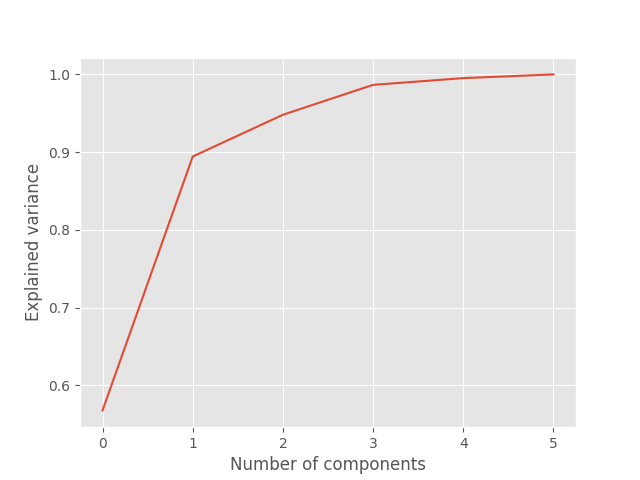